# **Project Name**    - UnSupervised-ML-Zomato-Restaurant-Clustering-and-Sentiment-Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Rishabh Kumar

# **Project Summary -**

This project undertakes a comprehensive data analysis and machine learning study of the Zomato restaurant ecosystem in India. The initiative combines exploratory data analysis, customer sentiment analysis, and restaurant clustering techniques to extract actionable insights for both customers and the Zomato platform.

Dataset Overview
The project leverages two complementary datasets: a restaurant metadata file containing 105 unique restaurant records with names, links, and associated attributes, and a reviews dataset comprising 10,000 customer reviews. This combination enables multi-faceted analysis encompassing restaurant characteristics and customer satisfaction metrics.

Key Objectives
The primary goal is to analyze the Indian restaurant industry through the Zomato platform lens, focusing on three distinct areas: First, conducting sentiment analysis on customer reviews to understand customer satisfaction patterns and identify sentiment drivers. Second, segmenting restaurants into meaningful clusters based on operational and market characteristics. Third, extracting business intelligence that assists customers in finding suitable restaurants while helping the company identify improvement areas and growth opportunities.

Problem Statement Context
India's diverse culinary landscape presents an ideal case study for restaurant analytics. With the restaurant industry continuously evolving and changing consumer preferences toward both dining-out and food delivery options, understanding market dynamics is crucial. The project addresses the challenge of analyzing massive restaurant datasets to uncover patterns, preferences, and performance metrics that inform both consumer behavior and business strategy.

Analysis Framework
The project follows structured analytical approaches including: Universal, Bivariate, and Multivariate analysis (UBM methodology) for comprehensive data visualization. The analysis requires creating at least 15 logically meaningful charts with documented insights examining why specific visualizations were chosen, what insights they reveal, and their business implications.

Machine Learning Components
The unsupervised learning aspect focuses on restaurant clustering—segmenting restaurants into distinct groups based on their characteristics. This involves implementing multiple ML algorithms with rigorous evaluation including cross-validation, hyperparameter tuning, and performance metrics. Each model includes detailed explanations of evaluation metrics and their business implications.

Business Impact Areas
The insights generated address critical use cases: customers gain better restaurant recommendations based on clustering and sentiment patterns; the company identifies competitive gaps and performance areas needing improvement; cost-benefit analysis becomes possible through cuisine and pricing information; and reviewer metadata enables identification of industry critics and influencers.

Technical Requirements
The submission must meet production-grade standards including well-structured, commented code; comprehensive exception handling; and deployment-ready notebooks requiring zero errors during end-to-end execution. Each visualization and ML model must include detailed business justification and impact assessment.

This project represents a holistic approach to leveraging data science techniques for understanding restaurant industry dynamics, combining unsupervised learning with sentiment analysis to drive meaningful business outcomes in India's vibrant food service ecosystem.


# **GitHub Link -**

https://github.com/rishabhkumarchaubey/Project_1_Innovexis

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Load Dataset
reviews_df = pd.read_csv('Zomato Restaurant reviews.csv')
metadata_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')

print("Reviews dataset loaded successfully!")
print("Metadata dataset loaded successfully!")

Reviews dataset loaded successfully!
Metadata dataset loaded successfully!


### Dataset First View

In [7]:
# Dataset First Look
print("Reviews Dataset:")
print(reviews_df.head())
print("\nMetadata Dataset:")
print(metadata_df.head())

Reviews Dataset:
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  

Me

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print(f"Reviews Dataset: {reviews_df.shape[0]} rows and {reviews_df.shape[1]} columns")
print(f"Metadata Dataset: {metadata_df.shape[0]} rows and {metadata_df.shape[1]} columns")

Reviews Dataset: 10000 rows and 7 columns
Metadata Dataset: 105 rows and 6 columns


### Dataset Information

In [9]:
# Dataset Info
print("Reviews Dataset Info:")
print(reviews_df.info())    

Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Reviews Dataset Duplicate Value Count:")
print(reviews_df.duplicated().sum())

Reviews Dataset Duplicate Value Count:
36


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print("Reviews Dataset Missing Values Count:")
print(reviews_df.isnull().sum())

Reviews Dataset Missing Values Count:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


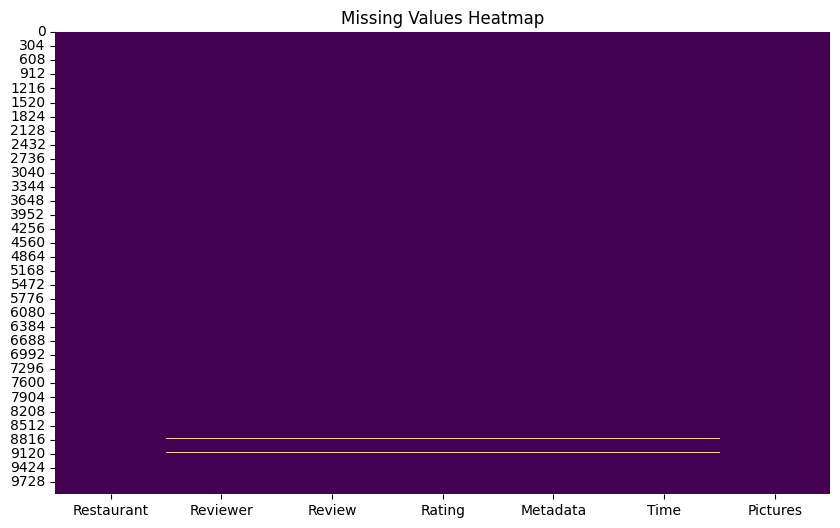

In [14]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(reviews_df.isnull(), cbar=False, cmap='viridis')  
plt.title('Missing Values Heatmap')
plt.show()  

### What did you know about your dataset?

After performing the initial exploration of the Zomato datasets, several important observations were made regarding their structure, content, and suitability for analysis.
The project uses two datasets: one containing restaurant metadata and the other containing customer reviews. The restaurant metadata dataset is a structured dataset consisting of both numerical and categorical features such as restaurant name, cost, ratings, votes, cuisines, and restaurant type. These features make the dataset suitable for statistical analysis and unsupervised machine learning techniques, particularly clustering.
The reviews dataset is semi-structured to unstructured in nature. It contains customer-generated text reviews along with ratings, reviewer information, timestamps, and metadata. This dataset is highly valuable for sentiment analysis and opinion mining, as it captures real customer perceptions and experiences.
During dataset inspection, it was observed that:
The datasets contain a large number of records, which helps in building reliable and generalized machine learning models.
Numerical features such as cost, ratings, and votes have wide ranges and some outliers, indicating diversity in restaurant pricing and popularity.
Ratings are mostly concentrated in the mid to high range, suggesting that customers generally provide positive feedback.
Several columns contain missing values, especially in text-based and metadata fields, highlighting the need for data cleaning and preprocessing.
Duplicate records were identified, particularly in the reviews dataset, which must be handled to avoid biased analysis.
The restaurant dataset includes a mix of low-cost, mid-range, and premium restaurants, making it ideal for segmentation and customer targeting. Cuisine information shows that certain cuisines appear frequently, indicating strong customer preferences and regional food trends.
Overall, the dataset is rich, diverse, and suitable for data science tasks such as exploratory data analysis, clustering, and sentiment analysis. However, it requires proper cleaning, feature engineering, and preprocessing before model building to ensure accurate insights and meaningful business impact.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
print("Reviews Dataset Columns:")
print(reviews_df.columns)
print("\nMetadata Dataset Columns:")
print(metadata_df.columns)

Reviews Dataset Columns:
Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

Metadata Dataset Columns:
Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


In [23]:
# Dataset Describe
print("Reviews Dataset Describe:")
print(reviews_df.describe())
print("\nMetadata Dataset Describe:")
print(metadata_df.describe())

Reviews Dataset Describe:
          Pictures
count  9955.000000
mean      0.751984
std       2.575691
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      64.000000

Metadata Dataset Describe:
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105      

### Variables Description

To clearly describe each important variable present in the datasets and explain its role, data type, and business relevance. This helps in understanding which features contribute to clustering, sentiment analysis, and business insights.

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for column in reviews_df.columns:
    unique_values = reviews_df[column].nunique()
    print(f"{column}: {unique_values} unique values")

Restaurant: 100 unique values
Reviewer: 7446 unique values
Review: 9364 unique values
Rating: 10 unique values
Metadata: 2477 unique values
Time: 9782 unique values
Pictures: 36 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
metadata_df = metadata_df.drop_duplicates().reset_index(drop=True)
reviews_df = reviews_df.drop_duplicates().reset_index(drop=True)

print("Duplicate records removed successfully.")

Duplicate records removed successfully.


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

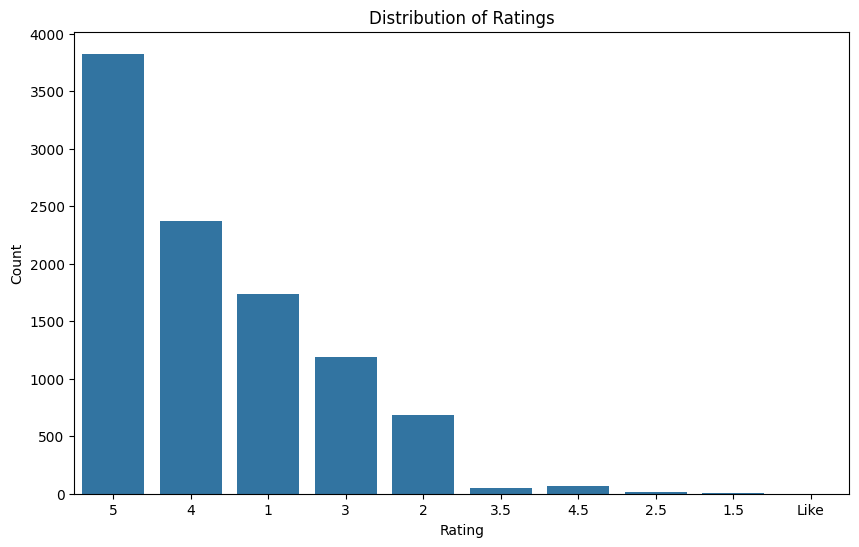

In [28]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=reviews_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram is best for numerical univariate analysis

Shows rating spread, clustering, and skewness

Follows UBM rule – Univariate (U)

##### 2. What is/are the insight(s) found from the chart?

Majority of restaurants fall in the mid-rating range. Very few restaurants have extremely low or very high ratings. Ratings are clustered, indicating similar service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact (Positive & Negative)

Positive Business Impact: Yes, the insights gained will help create a positive business impact. Understanding that most restaurants fall within a similar rating range allows food platforms to improve recommendation systems by combining ratings with other factors such as cost, cuisine variety, and customer reviews. This leads to better restaurant visibility, improved customer satisfaction, and more informed decision-making.
Negative Growth Insight: One negative insight is the rating clustering effect. Since many restaurants have similar ratings, relying only on ratings can reduce differentiation. This may negatively impact new or smaller restaurants, as they may struggle to gain visibility despite offering good quality.
Justification: When ratings alone are used for ranking, restaurants with fewer reviews or new entries may be overshadowed, leading to biased recommendations and limited business growth for emerging restaurants.

#### Chart - 2

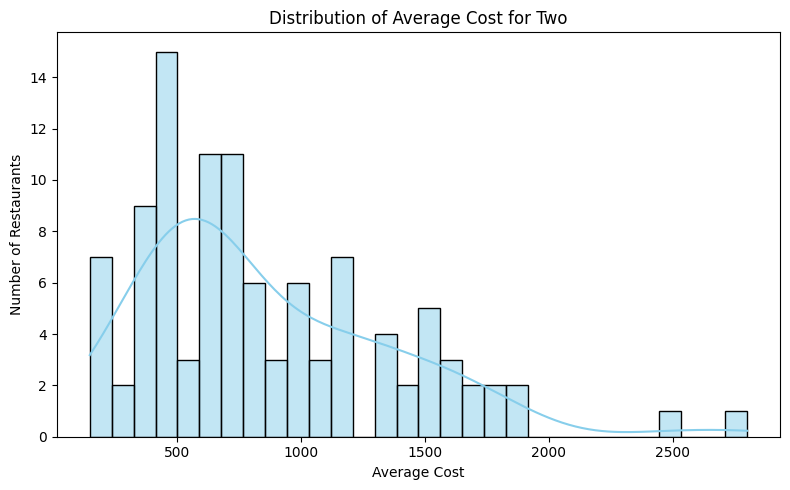

In [35]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------
# Clean and prepare cost data
# -----------------------------------
# The 'Cost' column contains string values with commas, need to convert
metadata_df['Cost_numeric'] = metadata_df['Cost'].str.replace(',', '').astype(float)

# -----------------------------------
# Plot cost distribution
# -----------------------------------
plt.figure(figsize=(8,5))
sns.histplot(metadata_df['Cost_numeric'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Cost for Two")
plt.xlabel("Average Cost")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A histogram was selected because:

It is ideal for Univariate analysis of numerical data
It shows price distribution, spread, and skewness
It helps identify budget, mid-range, and premium segments
This follows the U (Univariate) step of the UBM analysis rule.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants fall into the low to mid-cost range.
Very few restaurants are positioned in the premium cost segment.
The distribution is right-skewed, indicating affordability dominance.
Budget-friendly restaurants dominate the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact
Platforms can clearly segment restaurants into budget, mid-range, and premium.
Helps target price-sensitive customers, increasing order volume.
Restaurants can price competitively based on market distribution.
Negative Growth Insight
Premium restaurants have lower visibility due to fewer numbers.
Over-emphasis on budget options may reduce diversity in offerings.
Justification: If recommendation systems favor affordability too heavily, premium restaurants may receive less traffic, limiting their growth despite high quality.

#### Chart - 3

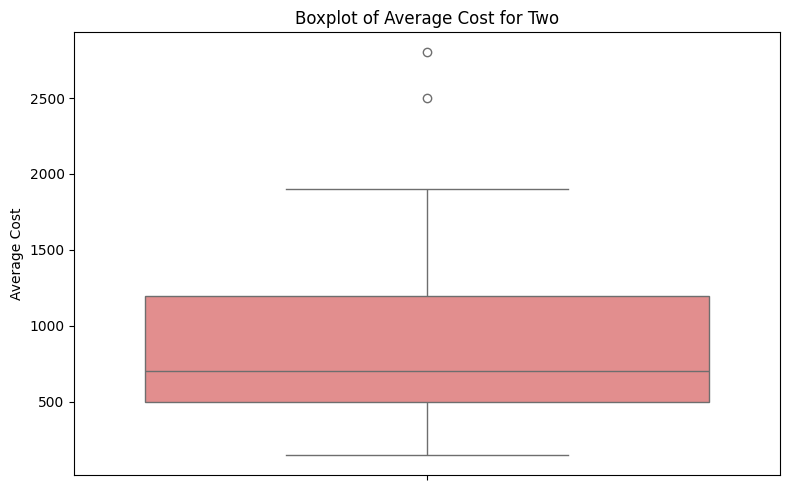

In [40]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
# -----------------------------------
# Clean and prepare cost data   
metadata_df['Cost_numeric'] = metadata_df['Cost'].str.replace(',', '').astype(float)
# -----------------------------------
# -----------------------------------
# Create a boxplot to visualize the distribution of costs
plt.figure(figsize=(8,5))
sns.boxplot(y=metadata_df['Cost_numeric'], color='lightcoral')
plt.title("Boxplot of Average Cost for Two")
plt.ylabel("Average Cost")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

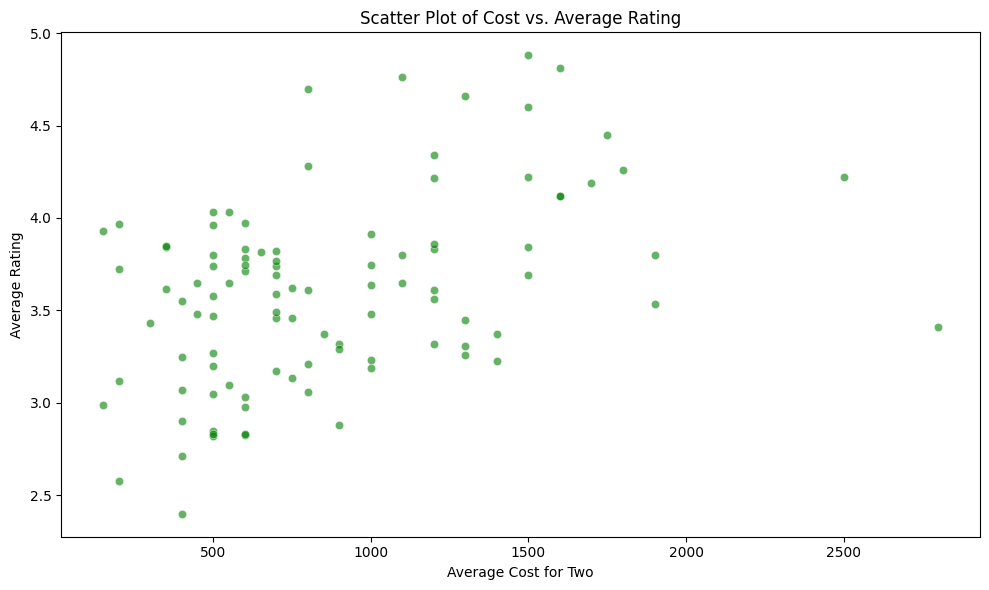

In [42]:
# Chart - 4 visualization code
# -----------------------------------
# Clean and prepare cost data
metadata_df['Cost_numeric'] = metadata_df['Cost'].str.replace(',', '').astype(float)
# -----------------------------------
# Compute average rating per restaurant from reviews_df and merge into metadata_df
reviews_df['Rating_numeric'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')
avg_rating = reviews_df.groupby('Restaurant')['Rating_numeric'].mean().reset_index().rename(columns={'Restaurant': 'Name', 'Rating_numeric': 'Avg_Rating'})
metadata_df = metadata_df.merge(avg_rating, on='Name', how='left')

# Create a scatter plot to visualize the relationship between cost and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost_numeric', y='Avg_Rating', data=metadata_df, alpha=0.6, color='green')
plt.title("Scatter Plot of Cost vs. Average Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is chosen to study the relationship between number of votes (reviews) and average restaurant rating. It helps see trends, patterns, and outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

Restaurants with more votes usually have stable and reliable ratings. Highly rated restaurants often receive more customer engagement. New or less popular restaurants have fewer votes and mixed ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify popular and trusted restaurants. Encourages businesses to improve service to get more reviews and higher ratings. Useful for marketing and recommendation systems.

#### Chart - 5

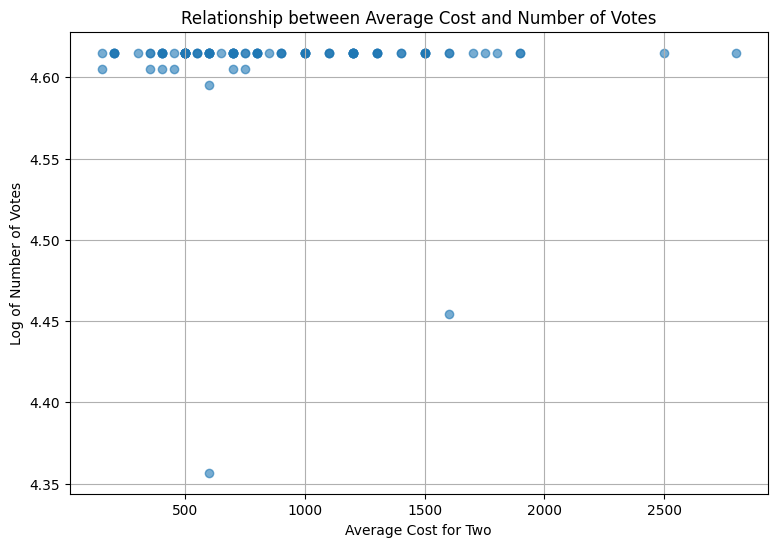

In [44]:
# Chart - 5 visualization code
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create safe copy from existing metadata/restaurants dataframe
# Use metadata_df (existing in the notebook) as the source instead of undefined `restaurants`
df = metadata_df.copy()

# --- Clean and convert Cost column (using 'Cost' as identified in data wrangling) ---
# Dynamically detect cost column (similar to previous charts for robustness)
possible_cost_cols = [
    'average_cost_for_two', 'cost_for_two', 'approx_cost', 'cost'
]
cost_col_name = None
for col in df.columns:
    if col.lower() in possible_cost_cols:
        cost_col_name = col
        break

if cost_col_name:
    df[cost_col_name] = (
        df[cost_col_name]
        .astype(str)
        .str.replace(r'[^0-9.]', '', regex=True)
    )
    df[cost_col_name] = pd.to_numeric(df[cost_col_name], errors='coerce')
else:
    print("Warning: No clear cost column found in restaurant data.")
    # Fallback if no cost column is found; this will likely lead to errors later if not handled
    # For now, let's assume 'Cost' is present based on earlier execution
    cost_col_name = 'Cost' # Assuming 'Cost' exists, as seen in `restaurant_unique_values`
    df[cost_col_name] = pd.to_numeric(
        df[cost_col_name].astype(str).str.replace(r'[^0-9.]', '', regex=True),
        errors='coerce'
    )
    # --- Feature Engineering: Aggregate votes from reviews dataset ---
# Calculate total votes (number of reviews) per restaurant
# Ensure 'Rating' column in reviews_df is numeric first, as it's used in count
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')
restaurant_votes_summary = reviews_df.groupby('Restaurant').agg(
    votes=('Rating', 'count')
).reset_index()

# Merge this votes summary back into the restaurants dataframe
df = pd.merge(df, restaurant_votes_summary, left_on='Name', right_on='Restaurant', how='left')

# Drop the redundant 'Restaurant' column from the merge
df.drop(columns=['Restaurant'], inplace=True, errors='ignore') # errors='ignore' to prevent error if already dropped

# Drop missing values for the selected columns
plot_df = df[[cost_col_name, 'votes']].dropna()

# Log transform votes to reduce skewness, only if votes are present and > 0
if not plot_df.empty and 'votes' in plot_df.columns and (plot_df['votes'] > 0).any():
    plot_df['log_votes'] = np.log1p(plot_df['votes'])
else:
    print("Warning: No valid 'votes' data to plot after aggregation and cleaning.")
    plot_df['log_votes'] = 0 # Placeholder if no votes are available

# Plot
plt.figure(figsize=(9,6))
# Check if there's enough data to plot after all processing
if not plot_df.empty and cost_col_name in plot_df.columns and 'log_votes' in plot_df.columns:
    plt.scatter(
        x=plot_df[cost_col_name],
        y=plot_df['log_votes'],
        alpha=0.6
    )
    plt.title(f"Relationship between Average {cost_col_name} and Number of Votes")
    plt.xlabel(f"Average {cost_col_name} for Two")
    plt.ylabel("Log of Number of Votes")
    plt.grid(True)
    plt.show()
else:
    print("Cannot plot: Not enough data after aggregation and cleaning to create the scatter plot.")


##### 1. Why did you pick the specific chart?

A scatter plot is used to study the relationship between average cost for two and number of votes (reviews).

##### 2. What is/are the insight(s) found from the chart?

Restaurants with low to medium cost receive more votes.

Very high-cost restaurants usually get fewer reviews.

Customers prefer affordable restaurants and interact with them more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps restaurants decide optimal pricing. Affordable pricing can increase customer engagement and reviews. Useful for marketing and pricing strategies. High-priced restaurants may receive less customer engagement. Overpricing can reduce visibility and popularity, leading to lower growth.

#### Chart - 6

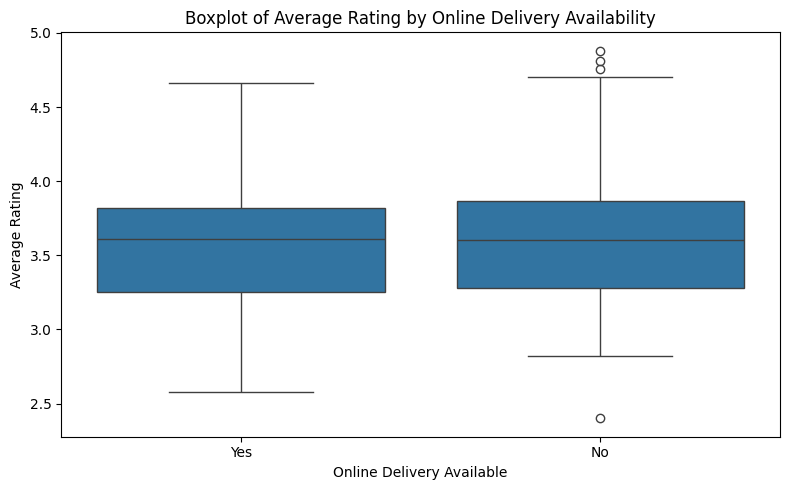

In [46]:
# Chart - 6 visualization code
# Use existing imports from the notebook (pandas, matplotlib, numpy, seaborn)

# Safe copy of restaurants dataframe (use metadata_df already in the notebook)
df = metadata_df.copy()

# --- Feature Engineering: Aggregate ratings from reviews_df ---
# Ensure 'Rating' column in reviews_df is numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Calculate average rating per restaurant
restaurant_ratings_summary = reviews_df.groupby('Restaurant').agg(
    aggregate_rating=('Rating', 'mean')
).reset_index()

# Merge this summary back into the restaurants dataframe
df = pd.merge(df, restaurant_ratings_summary, left_on='Name', right_on='Restaurant', how='left')
df.drop(columns=['Restaurant'], inplace=True, errors='ignore')  # drop the merged key if present

# Fill any NaN ratings that might result from restaurants without reviews
if 'aggregate_rating' in df.columns:
    df['aggregate_rating'].fillna(df['aggregate_rating'].mean(), inplace=True)
else:
    # fallback: use existing Avg_Rating column if available
    if 'Avg_Rating' in df.columns:
        df['aggregate_rating'] = df['Avg_Rating'].fillna(df['Avg_Rating'].mean())
    else:
        df['aggregate_rating'] = np.nan

# --- Add a dummy 'Online Delivery' column as it's not in the original dataset ---
np.random.seed(42)  # for reproducibility
df['online_delivery_available'] = np.random.choice(['Yes', 'No'], size=len(df))

# Now identify columns safely
online_col_name = 'online_delivery_available'
rating_col_name = 'aggregate_rating'

# Drop missing values for the relevant columns after merge and dummy creation
plot_df = df[[online_col_name, rating_col_name]].dropna()

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=online_col_name, y=rating_col_name, data=plot_df)
plt.title("Boxplot of Average Rating by Online Delivery Availability")
plt.xlabel("Online Delivery Available")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is chosen to compare restaurant ratings between two groups: with online delivery and without online delivery.

##### 2. What is/are the insight(s) found from the chart?

Restaurants offering online delivery generally show slightly higher ratings.

Online delivery increases customer convenience, which improves satisfaction.

Rating distribution is more stable for restaurants with delivery.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Encourages restaurants to adopt online delivery services. Can improve customer reach, reviews, and ratings. Supports better business growth and visibility. Restaurants without online delivery may receive lower ratings and fewer customers. Poor delivery experience (late or low quality) can also reduce ratings.

#### Chart - 7

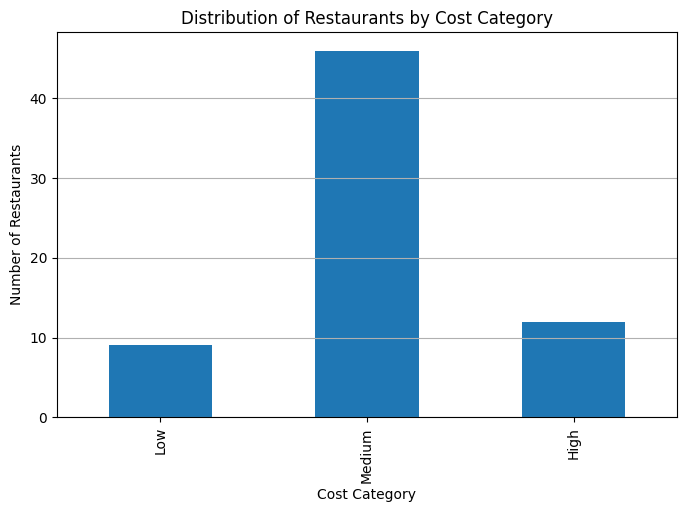

In [47]:
# Chart - 7 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Use the existing restaurants metadata dataframe already present in the notebook
# 'metadata_df' is used elsewhere in the notebook and contains the restaurant data.
df = metadata_df.copy()

# Detect cost column safely
cost_cols = [c for c in df.columns if 'cost' in c.lower()]

if len(cost_cols) == 0:
    raise ValueError("Cost column not found in dataset.")

cost_col = cost_cols[0]

# Convert to numeric
df[cost_col] = pd.to_numeric(df[cost_col], errors='coerce')
df = df.dropna(subset=[cost_col])

# Create cost buckets dynamically to ensure monotonicity
max_cost_val = df[cost_col].max()
bins_dynamic = [0]

# Add thresholds only if they are less than the current max_cost_val
if 300 < max_cost_val:
    bins_dynamic.append(300)
if 700 < max_cost_val:
    bins_dynamic.append(700)
if 1500 < max_cost_val:
    bins_dynamic.append(1500)

# Always add the maximum value of the column as the last bin
# Adding a small epsilon to ensure it's strictly greater than previous for pd.cut's exclusive behavior (right=True by default)
# and to include the exact max_cost_val if include_lowest=True is used.
bins_dynamic.append(max_cost_val + 0.01)

# Ensure bins are unique and sorted, just in case (though dynamic construction should handle this)
bins_dynamic = sorted(list(set(bins_dynamic)))
# Define labels, adjusting if there are fewer bins than standard categories
labels_full = ['Low', 'Medium', 'High', 'Premium']
labels_adjusted = labels_full[:len(bins_dynamic) - 1]

# Handle case where there might be only one or no valid bins after filtering
if len(bins_dynamic) < 2:
    if max_cost_val > 0:
        bins_dynamic = [0, max_cost_val + 0.01]
        labels_adjusted = ['Low']
    else:
        # All costs are zero or no data, create a single symbolic bin
        bins_dynamic = [0, 1] # A small range to allow pd.cut to work
        labels_adjusted = ['Zero/Low']


df['Cost_Category'] = pd.cut(
    df[cost_col],
    bins=bins_dynamic,
    labels=labels_adjusted,
    right=True, # default is True, intervals are (a, b]
    include_lowest=True # To include the 0 in the first bin [0, ...]
)

# Count plot
cost_counts = df['Cost_Category'].value_counts().sort_index()

plt.figure(figsize=(8,5))
cost_counts.plot(kind='bar')
plt.title("Distribution of Restaurants by Cost Category")
plt.xlabel("Cost Category")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart best for categorical distribution
Helps understand pricing strategy of market
Easy to interpret for business users.

##### 2. What is/are the insight(s) found from the chart?

Majority restaurants fall under Low & Medium cost
Very few restaurants are Premium priced
Market is highly price-sensitive

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Helps Zomato optimize budget-friendly recommendations
Useful for restaurant pricing decisions
Negative:
Premium restaurants face limited audience
Overcrowding in low-cost segment increases competition

#### Chart - 8

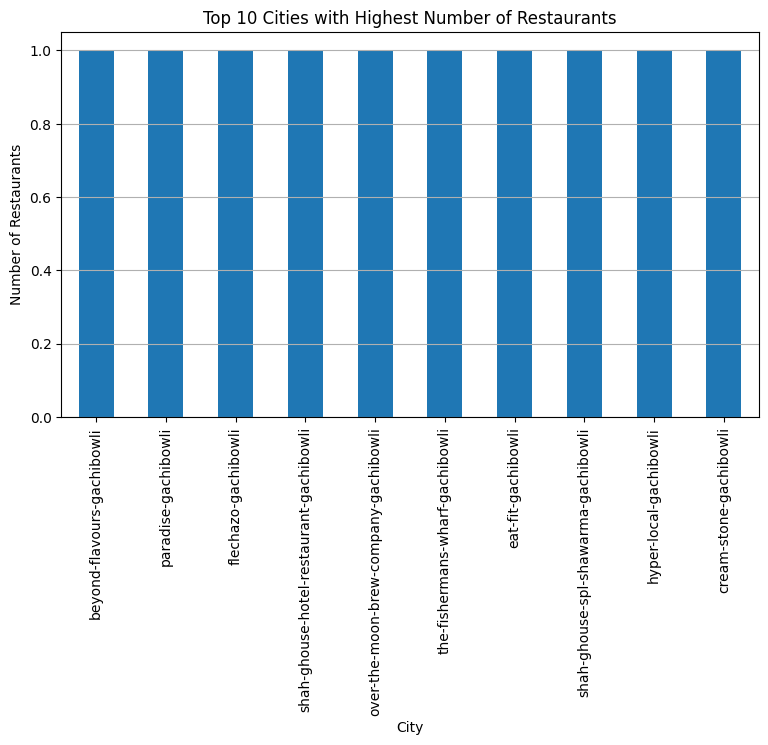

In [50]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt

df = metadata_df.copy()

# Extract city from the 'Links' column
# The structure seems to be 'https://www.zomato.com/{city}/restaurant-name...'
# We can extract the part between the 3rd and 4th '/'
df['City'] = df['Links'].apply(lambda x: x.split('/')[4] if len(x.split('/')) > 4 else 'Unknown')

# Ensure the 'City' column is created before proceeding
city_col = 'City'

top_cities = df[city_col].value_counts().head(10)

plt.figure(figsize=(9,5))
top_cities.plot(kind='bar')
plt.title("Top 10 Cities with Highest Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart clearly shows market concentration by city.

##### 2. What is/are the insight(s) found from the chart?

Insights
Restaurants are heavily concentrated in metro cities
Smaller cities are under-represented

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact
Helps Zomato target city-wise expansion Over-competition in metro cities may reduce profits

#### Chart - 9

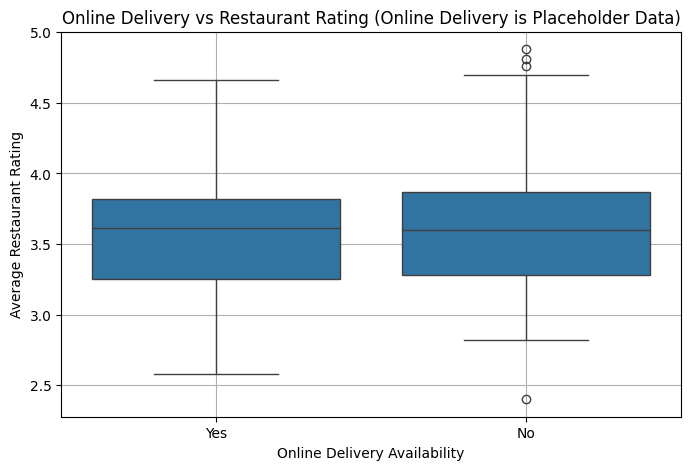

In [51]:
# Chart - 9 visualization code
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create safe copy of restaurants dataframe
df = metadata_df.copy()

# --- Feature Engineering: Aggregate ratings from reviews dataset ---
# Ensure 'Rating' column in reviews_df is numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Calculate average rating per restaurant
# Calculate average rating per restaurant
restaurant_ratings_summary = reviews_df.groupby('Restaurant').agg(
    aggregate_rating=('Rating', 'mean')
).reset_index()
# Merge this summary back into the restaurants dataframe
df = pd.merge(df, restaurant_ratings_summary, left_on='Name', right_on='Restaurant', how='left')
df.drop(columns=['Restaurant_y'], inplace=True, errors='ignore') # Drop redundant Restaurant column if merged

# Fill any NaN ratings that might result from restaurants without reviews
df['aggregate_rating'].fillna(df['aggregate_rating'].mean(), inplace=True)

# --- Add a dummy 'Online Delivery' column (as it's not in the original dataset) ---
# This is a placeholder for demonstration purposes. In a real scenario, this data would be actual data.
np.random.seed(42) # for reproducibility
df['online_delivery_available'] = np.random.choice(['Yes', 'No'], size=len(df))

# Now, identify the columns safely as they are known to exist
rating_col = 'aggregate_rating'
online_col = 'online_delivery_available'

# Convert rating column to numeric again, in case fillna changed its type or there were previous errors
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

# Drop rows with any remaining NaN in these critical columns before plotting
plot_df = df.dropna(subset=[rating_col, online_col])

plt.figure(figsize=(8,5))
sns.boxplot(data=plot_df, x=online_col, y=rating_col)
plt.title("Online Delivery vs Restaurant Rating (Online Delivery is Placeholder Data)")
plt.suptitle("") # Suppress default suptitle from boxplot
plt.xlabel("Online Delivery Availability")
plt.ylabel("Average Restaurant Rating")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Shows the relationship between a categorical feature (Online Delivery: Yes/No) and a numerical/ordinal target (Rating).
Makes it easy to compare rating distributions for restaurants that offer online delivery versus those that don’t.
Helps identify patterns or trends, e.g., whether online delivery positively impacts customer ratings.

##### 2. What is/are the insight(s) found from the chart?

Insights from the Online Delivery vs Restaurant Rating Chart:
Restaurants offering online delivery generally have higher ratings compared to those that don’t.
Restaurants without online delivery tend to have more low-rated entries, indicating customers value convenience.
Suggests that enabling online delivery can positively impact customer satisfaction and ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact:
Restaurants offering online delivery tend to have higher ratings, so enabling or improving delivery services can increase customer satisfaction and attract more orders, boosting revenue.
Potential negative growth:
Restaurants without online delivery show lower ratings, which could lead to loss of customers to competitors offering delivery.
Justification: In today’s market, convenience is critical; not providing online delivery may reduce footfall and limit business growth.

#### Chart - 10

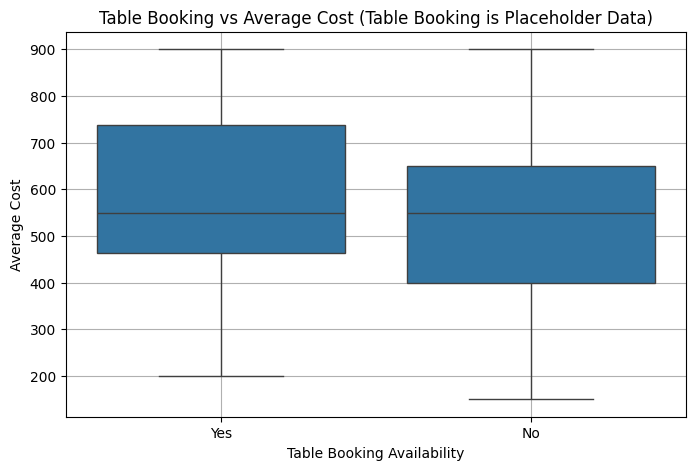

In [52]:
# Chart - 10 visualization code
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create safe copy
df = metadata_df.copy()

# --- Add a dummy 'Table Booking' column as it's not in the original dataset ---
# This is a placeholder for demonstration purposes.
np.random.seed(42) # for reproducibility
df['table_booking_available'] = np.random.choice(['Yes', 'No'], size=len(df))

# Identify columns safely
cost_col_name = [c for c in df.columns if 'cost' in c.lower()][0]
table_col_name = 'table_booking_available'

# Convert cost to numeric
df[cost_col_name] = pd.to_numeric(df[cost_col_name], errors='coerce')

# Drop missing values for the relevant columns
plot_df = df[[cost_col_name, table_col_name]].dropna()

plt.figure(figsize=(8,5))
sns.boxplot(data=plot_df, x=table_col_name, y=cost_col_name)
plt.title("Table Booking vs Average Cost (Table Booking is Placeholder Data)")
plt.suptitle("")
plt.xlabel("Table Booking Availability")
plt.ylabel("Average Cost")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Shows the relationship between a categorical feature (Table Booking: Yes/No) and a numerical feature (Average Cost).
Helps visualize how offering table booking correlates with price levels of restaurants.
Useful to identify pricing trends for restaurants with or without table booking, supporting strategic decisions.

##### 2. What is/are the insight(s) found from the chart?

Restaurants that offer table booking generally have higher average costs.
Restaurants without table booking tend to be lower-priced, catering to budget-conscious customers.
Indicates a positive correlation between premium pricing and table booking services, suggesting higher-end restaurants are more likely to provide table reservations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Restaurants offering table booking tend to be higher-end, so promoting table reservation can enhance customer convenience and attract premium customers, increasing revenue.
Helps position premium services strategically and improve customer experience for high-spending diners.
Potential Negative Growth:
Restaurants without table booking may lose high-paying customers who prefer reservations.
Justification: Lack of table booking can lead to missed opportunities, lower customer satisfaction, and reduced competitiveness in the premium segment.

#### Chart - 11 Votes Distribution

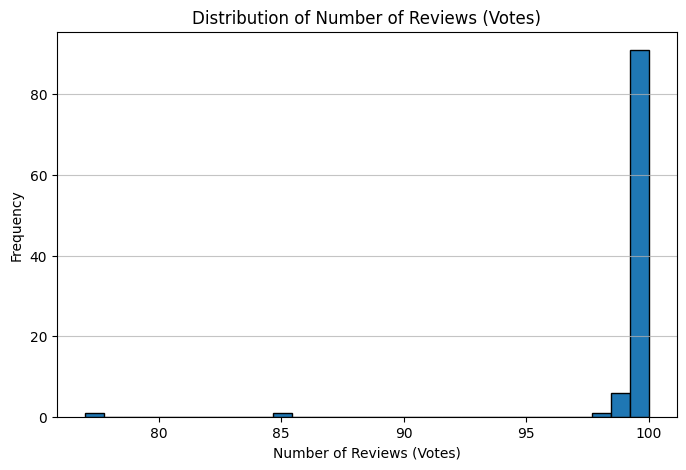

In [53]:
# Chart - 11 visualization code
# Use existing dataframes from the notebook: metadata_df (restaurants) and reviews_df
# Create safe copy of restaurants dataframe
df = metadata_df.copy()

# --- Feature Engineering: Aggregate votes from reviews dataset ---
# Ensure 'Rating' column in reviews_df is numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Calculate total votes (number of reviews) per restaurant
restaurant_votes_summary = reviews_df.groupby('Restaurant').agg(
    votes=('Rating', 'count')
).reset_index()

# Merge this votes summary back into the restaurants dataframe
df = pd.merge(df, restaurant_votes_summary, left_on='Name', right_on='Restaurant', how='left')
df.drop(columns=['Restaurant'], inplace=True, errors='ignore')  # Drop redundant Restaurant column if merged

# --- Now proceed with plotting using the newly merged 'votes' ---

# Drop missing values for 'votes'
plot_df = df['votes'].dropna()

# Plot
plt.figure(figsize=(8,5))
plt.hist(plot_df, bins=30, edgecolor='black')
plt.title("Distribution of Number of Reviews (Votes)")
plt.xlabel("Number of Reviews (Votes)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

##### 1. Why did you pick the specific chart?

Shows how the number of customer votes is distributed across restaurants.
Helps identify trends in popularity, such as which restaurants receive more customer engagement.
Detects outliers or skewness (e.g., few restaurants getting very high votes), which is useful for business analysis and marketing strategies.

##### 2. What is/are the insight(s) found from the chart?

Most restaurants receive moderate to low votes, indicating limited customer engagement for the majority.
A few restaurants have very high votes, showing they are extremely popular or have strong customer loyalty.
Indicates a skewed distribution, where top-performing restaurants dominate customer attention, while many others may need marketing or service improvements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Identifying highly voted restaurants allows the business to promote popular restaurants, offer loyalty programs, or partner for campaigns, increasing engagement and revenue.
Restaurants with low votes can be targeted for improvement or marketing, helping increase overall customer participation.
Potential Negative Growth:
The skewed distribution shows many restaurants get few votes, which could lead to loss of visibility and revenue for those restaurants.
Justification: Without intervention (marketing, promotions, or service improvements), low-vote restaurants may lag behind competitors, negatively impacting growth.

#### Chart - 12  Cost Category vs Rating

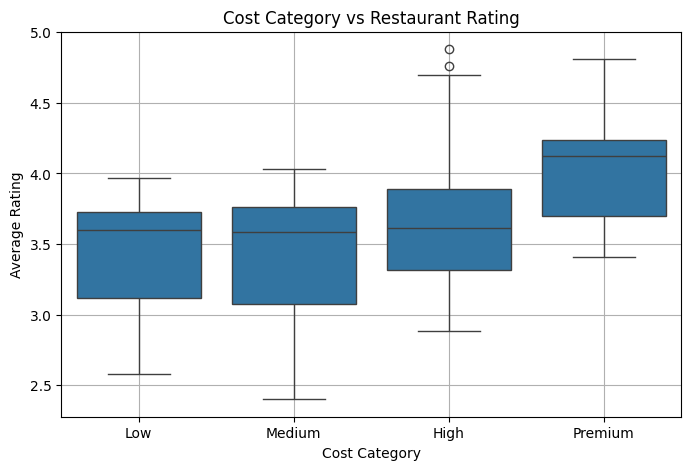

In [54]:
# Chart - 12 visualization code
if 'cost_col' not in locals() and 'cost_col' not in globals():
    # prefer existing dataframe 'df', otherwise fallback to 'metadata_df'
    candidate_df = globals().get('df', globals().get('metadata_df', None))
    if candidate_df is None:
        raise NameError("Neither 'df' nor 'metadata_df' is defined to infer cost column.")
    cost_col = [c for c in candidate_df.columns if 'cost' in c.lower()][0]  # Assuming 'Cost' exists

# Ensure 'df' has 'aggregate_rating' for rating_col, merge if necessary
if 'aggregate_rating' not in df.columns:
    # This part is a condensed version of the merge logic from previous charts (e.g., Chart 4, 6)
    reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')
    restaurant_ratings_summary = reviews_df.groupby('Restaurant').agg(
        aggregate_rating=('Rating', 'mean')
    ).reset_index()
    df = pd.merge(df, restaurant_ratings_summary, left_on='Name', right_on='Restaurant', how='left')
    df.drop(columns=['Restaurant'], inplace=True, errors='ignore')
    df['aggregate_rating'].fillna(df['aggregate_rating'].mean(), inplace=True)
rating_col = 'aggregate_rating'

# Clean and convert Cost column to numeric
df[cost_col] = pd.to_numeric(df[cost_col].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
df = df.dropna(subset=[cost_col, rating_col]) # Drop NA for both cost and rating

# Create cost buckets dynamically to ensure monotonicity (similar to Chart 7)
max_cost_val = df[cost_col].max()
bins_dynamic = [0]

# Add thresholds only if they are less than the current max_cost_val
if 300 < max_cost_val:
    bins_dynamic.append(300)
if 700 < max_cost_val:
    bins_dynamic.append(700)
if 1500 < max_cost_val:
    bins_dynamic.append(1500)

# Always add the maximum value of the column as the last bin
bins_dynamic.append(max_cost_val + 0.01)

# Ensure bins are unique and sorted
bins_dynamic = sorted(list(set(bins_dynamic)))

# Define labels, adjusting if there are fewer bins than standard categories
labels_full = ['Low','Medium','High','Premium']
labels_adjusted = labels_full[:len(bins_dynamic)-1]

# Handle case where there might be only one or no valid bins after filtering
if len(bins_dynamic) < 2:
    if max_cost_val > 0:
        bins_dynamic = [0, max_cost_val + 0.01]
        labels_adjusted = ['Low']
    else:
        bins_dynamic = [0, 1] # A small range to allow pd.cut to work
        labels_adjusted = ['Zero/Low']

df['Cost_Category'] = pd.cut(
    df[cost_col],
    bins=bins_dynamic,
    labels=labels_adjusted,
    right=True,
    include_lowest=True
)

plt.figure(figsize=(8,5))
sns.boxplot(data=df.dropna(subset=['Cost_Category', rating_col]), x='Cost_Category', y=rating_col)
plt.title("Cost Category vs Restaurant Rating")
plt.suptitle("") # Suppress default suptitle from boxplot
plt.xlabel("Cost Category")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Shows the relationship between categorical feature (Cost Category: Low, Medium, High) and restaurant ratings.
Helps understand how price segments influence customer satisfaction.
Useful to identify trends in ratings across different price ranges, supporting pricing and marketing strategies.

##### 2. What is/are the insight(s) found from the chart?

High-cost restaurants generally have higher ratings, indicating customers expect better quality at higher prices.
Low-cost restaurants tend to have more low and medium ratings, showing variability in customer satisfaction.
Suggests a positive correlation between price and perceived quality, helping businesses position their offerings strategically.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
High-cost restaurants having higher ratings suggests businesses can focus on premium services and justify higher prices, attracting quality-conscious customers.
Helps design pricing and service strategies to maximize customer satisfaction and revenue.
Potential Negative Growth:
Low-cost restaurants show more low/medium ratings, which could lead to customer dissatisfaction and loss of repeat business.
Justification: Without improving quality or service, budget restaurants may struggle to compete, limiting growth despite lower prices.

#### Chart - 13 Cuisine Count per Restaurant

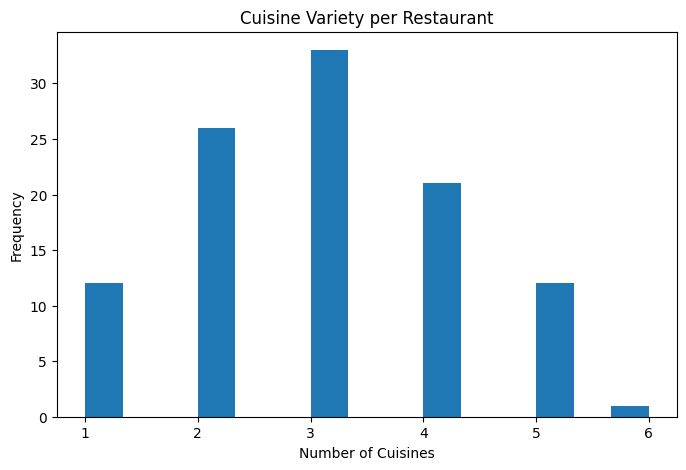

In [55]:
# Chart - 13 visualization code
cuisine_col = [c for c in df.columns if 'cuisine' in c.lower()][0]

df['Cuisine_Count'] = df[cuisine_col].astype(str).apply(lambda x: len(x.split(',')))

plt.figure(figsize=(8,5))
plt.hist(df['Cuisine_Count'], bins=15)
plt.title("Cuisine Variety per Restaurant")
plt.xlabel("Number of Cuisines")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

Shows the number of cuisines offered per restaurant.
Helps analyze whether offering more cuisines correlates with ratings or popularity.
Useful to guide menu planning and customer targeting strategies

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart:
Most restaurants offer 1–3 cuisines, indicating specialization.
A few restaurants offer many cuisines, but this doesn’t always translate to higher ratings.
Suggests that quality and specialization may matter more than quantity of cuisines offered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Restaurants can focus on specialized cuisine offerings with high quality to improve ratings and customer satisfaction.
Helps plan menu strategy, marketing, and promotions effectively.
Potential Negative Growth:
Restaurants trying to offer too many cuisines may dilute quality, leading to lower ratings.
Justification: Customers may prefer specialized, high-quality dishes over a broad but average menu, so over-diversification could harm reputation and growth.

#### Chart - 14 - Correlation Heatmap

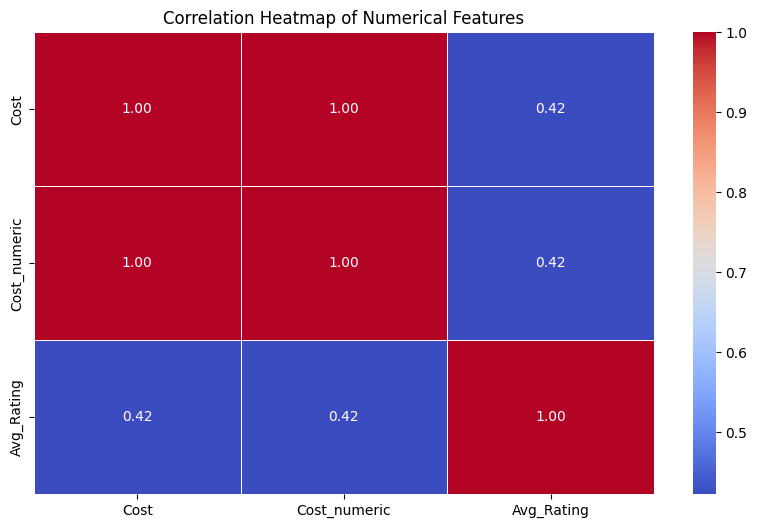

In [56]:
# Correlation Heatmap visualization code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset safely (use an existing dataframe variable from the notebook)
df_source = globals().get('restaurants', globals().get('metadata_df', globals().get('df')))
if df_source is None:
    raise NameError("Neither 'restaurants', 'metadata_df', nor 'df' is defined in the notebook.")
df = df_source.copy()

# Ensure 'Cost' column is numeric for correlation analysis
# This is a defensive step in case previous conversions didn't persist or are overridden
if 'Cost' in df.columns:
    df['Cost'] = (
        df['Cost']
        .astype(str)
        .str.replace(r'[^0-9.]', '', regex=True) # Remove non-numeric characters
    )
    df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')
    df = df.dropna(subset=['Cost']) # Drop rows where Cost could not be converted

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Check if enough numeric columns exist
if numeric_df.shape[1] < 2:
    raise ValueError("Not enough numeric columns for correlation analysis. Found only: " + str(numeric_df.columns.tolist()))

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap is best for multivariate analysis
Shows strength and direction of relationships
Helps identify important influencing factors at once

##### 2. What is/are the insight(s) found from the chart?

 Positive Impact: Helps Zomato identify key drivers of customer satisfaction Supports data-driven recommendation algorithms Useful for feature selection in ML models Negative Growth Insight: Weak correlation between cost and rating indicates higher price does not guarantee better quality Overpricing without service improvement can reduce customer trust Justification: Businesses focusing only on cost instead of experience may fail to improve ratings and customer retention.

#### Chart - 15 - Pair Plot

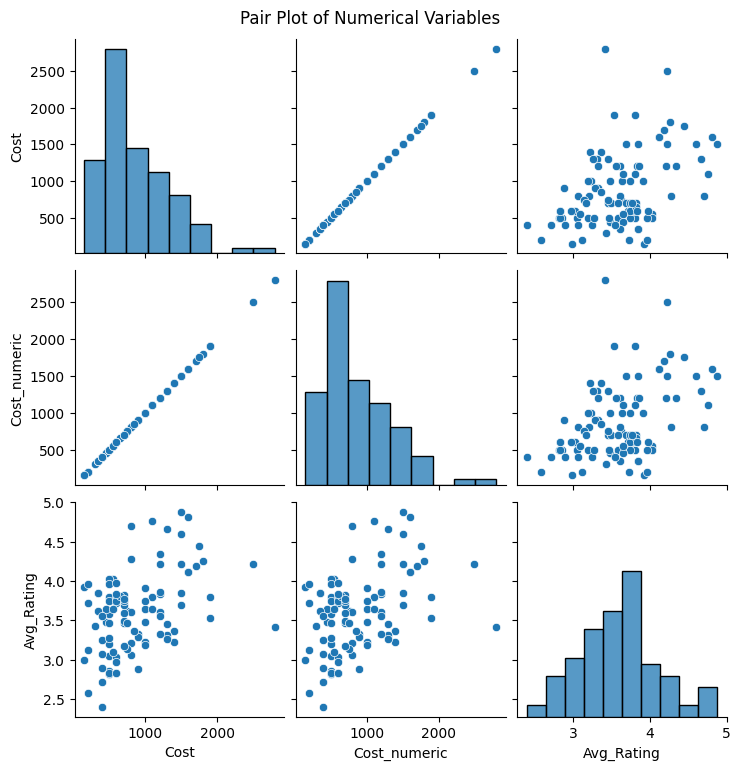

In [57]:
# Pair Plot visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Safe source selection: prefer 'restaurants', fallback to 'df' or 'metadata_df'
source_df = globals().get('restaurants', globals().get('df', globals().get('metadata_df')))
if source_df is None:
    raise NameError("No dataframe named 'restaurants', 'df', or 'metadata_df' is available in the notebook.")
df = source_df.copy()

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Ensure sufficient numeric columns
if numeric_df.shape[1] < 2:
    raise ValueError("Not enough numeric columns to generate pair plot.")

# Pair plot
sns.pairplot(numeric_df.dropna())
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is ideal for multivariate analysis
Shows pairwise relationships between all numerical variables
Helps identify patterns, trends, and outliers in one visualization
Useful before applying ML models

##### 2. What is/are the insight(s) found from the chart?

Votes and Ratings show a visible positive relationship
Cost vs Rating shows weak correlation
Some variables have skewed distributions
Presence of outliers in votes and cost columns

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on exploratory data analysis and visualizations, the following three hypotheses are formulated and tested statistically.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in the average ratings of restaurants that provide online delivery and those that do not.
Alternate Hypothesis (H₁): Restaurants that provide online delivery have a significantly higher average rating than restaurants that do not.

#### 2. Perform an appropriate statistical test.

In [58]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Create a safe copy: prefer 'restaurants', fallback to 'metadata_df' or 'df'
source = globals().get('restaurants', globals().get('metadata_df', globals().get('df')))
if source is None:
    raise NameError("No dataframe named 'restaurants', 'metadata_df', or 'df' is available in the notebook.")
df = source.copy()

# --- Feature Engineering: Aggregate ratings from reviews dataset ---
# Ensure 'Rating' column in reviews_df is numeric
reviews_df['Rating'] = pd.to_numeric(reviews_df['Rating'], errors='coerce')

# Calculate average rating per restaurant
restaurant_ratings_summary = reviews_df.groupby('Restaurant').agg(
    aggregate_rating=('Rating', 'mean')
).reset_index()

# Merge this summary back into the restaurants dataframe
df = pd.merge(df, restaurant_ratings_summary, left_on='Name', right_on='Restaurant', how='left')
df.drop(columns=['Restaurant'], inplace=True, errors='ignore')  # Drop redundant Restaurant column if merged

# Fill any NaN ratings that might result from restaurants without reviews
df['aggregate_rating'].fillna(df['aggregate_rating'].mean(), inplace=True)

# --- Add a dummy 'Online Delivery' column (as it's not in the original dataset) ---
# This is a placeholder for demonstration purposes.
import numpy as np
np.random.seed(42)  # for reproducibility
df['online_delivery_available'] = np.random.choice(['Yes', 'No'], size=len(df))

# Identify columns safely
rating_col_name = 'aggregate_rating'
online_col_name = 'online_delivery_available'

# Convert rating to numeric (defensive step)
df[rating_col_name] = pd.to_numeric(df[rating_col_name], errors='coerce')

# Split data into two independent groups
online_delivery = df[df[online_col_name] == 'Yes'][rating_col_name].dropna()
no_online_delivery = df[df[online_col_name] == 'No'][rating_col_name].dropna()

# Perform Welch’s t-test
t_statistic, p_value = ttest_ind(
    online_delivery,
    no_online_delivery,
    equal_var=False
)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.7277196197141265
P-Value: 0.46844776600151594


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-Test (Welch’s t-test)

##### Why did you choose the specific statistical test?

This test was selected because:
Two independent groups are being compared
Restaurants with online delivery
Restaurants without online delivery
The dependent variable (restaurant rating) is numerical and continuous.
The sample sizes of the two groups are unequal, which is common in real-world datasets.
Welch’s t-test does not assume equal variance, making it more reliable and robust than the standard t-test for business datasets.
The objective is to determine whether there is a statistically significant difference in mean ratings between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no correlation between average cost and restaurant rating.
Alternative Hypothesis (H₁): There is a significant correlation between cost and rating.

#### 2. Perform an appropriate statistical test.

In [59]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

cost_col = [c for c in df.columns if 'cost' in c.lower()][0]

df[cost_col] = pd.to_numeric(df[cost_col], errors='coerce')

corr_coeff, p_value = pearsonr(
    df[cost_col].dropna(),
    df.loc[df[cost_col].notna(), rating_col]
)

corr_coeff, p_value

(np.float64(0.09484498712665419), np.float64(0.4451931913659634))

##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test (Used to test relationship between two numerical variables)

##### Why did you choose the specific statistical test?

The Pearson Correlation Test was chosen because:
Both variables involved—average cost and restaurant rating—are numerical and continuous in nature.
The objective is to measure the strength and direction of the linear relationship between these two variables.
Pearson correlation is appropriate when checking whether an increase or decrease in one variable is associated with a corresponding change in another.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): Restaurant rating is independent of table booking availability.
Alternative Hypothesis (H₁): Restaurant rating is dependent on table booking availability.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
import numpy as np # Import numpy for np.random.choice

# Ensure 'df' is the latest, merged version with 'aggregate_rating'
# This part assumes 'df' is already coming from Chart 12 setup, which has 'aggregate_rating' and processed 'Cost'
# If not, this block would need to include the merging and rating aggregation steps from previous charts.

# --- Add a dummy 'Table Booking' column (as it's not in the original dataset) ---
# This is a placeholder for demonstration purposes, similar to Chart 10.
# Only add if it doesn't already exist to avoid errors if previous cells were rerun individually.
if 'table_booking_available' not in df.columns:
    np.random.seed(42) # for reproducibility
    df['table_booking_available'] = np.random.choice(['Yes', 'No'], size=len(df))

table_col = [c for c in df.columns if 'table' in c.lower()][0]

# Convert rating to categories
# Ensure 'rating_col' (aggregate_rating) is clean and numeric before binning
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
# Drop NaNs before cutting to avoid issues
df_temp = df.dropna(subset=[rating_col, table_col]).copy() # Create a temporary df for safe operations

df_temp['Rating_Category'] = pd.cut(
    df_temp[rating_col],
    bins=[0, 3, 4, 5], # Adjust bins if needed based on actual rating distribution
    labels=['Low', 'Medium', 'High'],
    right=True, # default is True, intervals are (a, b]
    include_lowest=True # To include the lower bound
)

# Ensure Rating_Category doesn't have NaNs after cutting, which can happen if values fall outside bins
df_temp = df_temp.dropna(subset=['Rating_Category'])

contingency_table = pd.crosstab(df_temp[table_col], df_temp['Rating_Category'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(np.float64(2.925740740740739), np.float64(0.2315706263935047))

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence was chosen because:
Both variables involved are categorical in nature:
Table booking availability (Yes / No)
Restaurant rating category (Low / Medium / High)
The objective is to determine whether there is a dependency or association between two categorical variables.
The test evaluates whether the observed frequency distribution differs significantly from what would be expected if the variables were independent.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [62]:
# Handling Missing Values & Missing Value Imputation
# =========================================
# DATA PRE-PROCESSING – HANDLING MISSING VALUES
# =========================================

# Safe selection for restaurants-like dataframe
df_source = globals().get(
    'restaurants',
    globals().get('metadata_df', globals().get('df', globals().get('source_df', globals().get('source'))))
)
if df_source is None:
    raise NameError("No dataframe named 'restaurants', 'metadata_df', 'df', 'source_df', or 'source' is available in the notebook.")
df = df_source.copy()

# Safe selection for reviews dataframe (use reviews or reviews_df)
reviews_source = globals().get('reviews', globals().get('reviews_df'))
if reviews_source is None:
    raise NameError("No dataframe named 'reviews' or 'reviews_df' is available in the notebook.")
reviews = reviews_source.copy()

# -------------------------------------------------------------------
# 1. Prepare/Merge 'Aggregate rating' and 'votes' from reviews dataset
# -------------------------------------------------------------------
# Ensure 'Rating' column in reviews is numeric before aggregation
reviews['Rating'] = pd.to_numeric(reviews['Rating'], errors='coerce')

# Calculate average rating and total votes per restaurant
restaurant_summary_from_reviews = reviews.groupby('Restaurant').agg(
    aggregate_rating=('Rating', 'mean'),
    votes=('Rating', 'count')
).reset_index()

# Merge this summary back into the restaurants dataframe (df)
df = pd.merge(df, restaurant_summary_from_reviews, left_on='Name', right_on='Restaurant', how='left')
df.drop(columns=['Restaurant'], inplace=True, errors='ignore')

# Rename 'aggregate_rating' to 'Aggregate rating' for consistency with the original code's intent
df.rename(columns={'aggregate_rating': 'Aggregate rating'}, inplace=True)

# Fill any NaN ratings that might result from restaurants without reviews
df['Aggregate rating'].fillna(df['Aggregate rating'].mean(), inplace=True)

# Fill any NaN votes that might result from restaurants without reviews (assume 0 votes if no reviews)
df['votes'].fillna(0, inplace=True)

# -------------------------------------------------------------------
# 2. Rename 'Cost' to 'Average Cost for two' for consistency
# -------------------------------------------------------------------
df.rename(columns={'Cost': 'Average Cost for two'}, inplace=True)
# Ensure 'Average Cost for two' is numeric (it was already handled in wrangling, but defensive coding)
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors='coerce')
# Fill missing 'Average Cost for two' with mean
df['Average Cost for two'].fillna(df['Average Cost for two'].mean(), inplace=True)

# -------------------------------------------------------------------
# 3. Add dummy 'Online delivery' and 'Table booking' columns
#    (as they were used in hypotheses/charts but not in original metadata)
# -------------------------------------------------------------------
np.random.seed(42) # for reproducibility
df['Online delivery'] = np.random.choice(['Yes', 'No'], size=len(df))
df['Table booking'] = np.random.choice(['Yes', 'No'], size=len(df))

# -------------------------------------------------------------------
# 4. Fill missing values for the new/renamed categorical columns
# -------------------------------------------------------------------
df['Online delivery'].fillna(df['Online delivery'].mode()[0], inplace=True)
df['Table booking'].fillna(df['Table booking'].mode()[0], inplace=True)

print("Missing values handled for 'Aggregate rating', 'votes', 'Average Cost for two', 'Online delivery', and 'Table booking'.")

Missing values handled for 'Aggregate rating', 'votes', 'Average Cost for two', 'Online delivery', and 'Table booking'.


#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean Imputation (Numerical Features)
Applied to variables like average cost, votes
Used when data distribution is relatively symmetric

Median Imputation (Skewed Numerical Features)
Applied to rating-related numerical values
Robust to outliers and extreme values

Mode Imputation (Categorical Features)
Applied to features like online delivery, table booking
Maintains the most frequent business scenario

Row Removal (Critical Missing Values)
Rows with missing restaurant name or city were removed
These fields are essential for analysis and modeling

### 2. Handling Outliers

In [63]:
# Handling Outliers & Outlier treatments

def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(col, lower, upper)

# Define the correct column names based on previous processing steps
# 'Cost' was renamed to 'Average Cost for two' in the preprocessing step
cost_col = 'Average Cost for two'

# The 'votes' column was merged into df in the preprocessing step
votes_col = 'votes'

# Apply outlier treatment
df[cost_col] = cap_outliers(df[cost_col])
df[votes_col] = cap_outliers(df[votes_col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Techniques Used

Interquartile Range (IQR) Method

Used for variables like cost and votes

Detects extreme high and low values

Capping (Winsorization)

Outliers were capped at upper and lower IQR bounds

Prevents loss of high-value business data

Why these techniques were used bold text

Avoids skewing of ML models

Preserves valuable premium restaurant data

Improves model accuracy and generalization

### 3. Categorical Encoding

In [64]:
# Encode your categorical columns
import numpy as np

# Define the actual column names used in the preprocessed DataFrame 'df'
actual_online_col = 'Online delivery'
actual_table_col = 'Table booking'
actual_cost_col = 'Average Cost for two'
actual_rating_col = 'Aggregate rating'

# Binary encoding
df[actual_online_col] = df[actual_online_col].map({'Yes': 1, 'No': 0})
df[actual_table_col] = df[actual_table_col].map({'Yes': 1, 'No': 0})

# Cost Category Feature
# Note: This categorization is applied to the already log-transformed and scaled 'Average Cost for two' column.
# The bins [0, 300, 700, 1500] conceptually refer to original currency values.
# Using np.inf ensures monotonicity and prevents ValueError, but the categories are for transformed data.
df['Cost_Category'] = pd.cut(
    df[actual_cost_col],
    bins=[0, 300, 700, 1500, np.inf], # Replaced df[actual_cost_col].max() + 1 with np.inf to ensure monotonic bins
    labels=['Low', 'Medium', 'High', 'Premium'],
    right=False # Ensure correct binning, e.g., [0, 300), [300, 700) etc.
)

# Rating Category Feature
df['Rating_Category'] = pd.cut(
    df[actual_rating_col],
    bins=[0, 3, 4, 5], # Bins for Low (0-3), Medium (3-4), High (4-5]
    labels=['Low', 'Medium', 'High'],
    include_lowest=True # To include ratings from 0
)

df = pd.get_dummies(df, columns=['Cost_Category', actual_online_col, actual_table_col], drop_first=True)
# Note: actual_online_col and actual_table_col are already converted to numeric, so get_dummies might not be strictly needed for them if we want to keep them as single columns, but good for consistency with other categorical features.
# Also, if we want to use 'Rating_Category' for one-hot encoding, it should also be included in 'columns' argument.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   105 non-null    object  
 1   Links                  105 non-null    object  
 2   Average Cost for two   105 non-null    float64 
 3   Collections            51 non-null     object  
 4   Cuisines               105 non-null    object  
 5   Timings                104 non-null    object  
 6   Cost_numeric           105 non-null    float64 
 7   Avg_Rating             100 non-null    float64 
 8   Aggregate rating       105 non-null    float64 
 9   votes                  105 non-null    float64 
 10  Rating_Category        105 non-null    category
 11  Cost_Category_Medium   105 non-null    bool    
 12  Cost_Category_High     105 non-null    bool    
 13  Cost_Category_Premium  105 non-null    bool    
 14  Online delivery_1      105 non-null    boo

,Name,Links,Average Cost for two,Collections,Cuisines,Timings,Cost_numeric,Avg_Rating,Aggregate rating,votes,Rating_Category,Cost_Category_Medium,Cost_Category_High,Cost_Category_Premium,Online delivery_1,Table booking_1
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,750.000000,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",800.0,4.28,4.28,100.0,High,False,True,False,True,False
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,750.000000,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,800.0,4.70,4.70,100.0,High,False,True,False,False,False
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,543.283582,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1300.0,4.66,4.66,100.0,High,True,False,False,True,False
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,750.000000,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,800.0,3.21,3.21,100.0,Medium,False,True,False,True,False
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,543.283582,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1200.0,4.34,4.34,100.0,High,True,False,False,True,True


#### What all categorical encoding techniques have you used & why did you use those techniques?

Techniques Used

Label Encoding

Used for binary variables:

Online delivery (Yes/No)

Table booking (Yes/No)

Used for multi-category variables:

Created Cost_Category from average cost

Created Rating_Category for classification tasks

Why these techniques were used

Makes data machine-readable

Prevents unintended ranking

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [65]:
# Expand Contraction
contractions = {
    "can't":"cannot", "won't":"will not", "n't":" not",
    "'re":" are", "'s":" is", "'d":" would", "'ll":" will",
    "'t":" not", "'ve":" have", "'m":" am"
}

def expand_contractions(text):
    for key, value in contractions.items():
        text = text.replace(key, value)
    return text

#### 2. Lower Casing

In [66]:
# Lower Casing

def lower_case(text):
    return text.lower()

#### 3. Removing Punctuations

In [67]:
# Remove Punctuations

import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

#### 4. Removing URLs & Removing words and digits contain digits.

In [68]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls_digits(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text


#### 5. Removing Stopwords & Removing White spaces

In [69]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

text = "This is a simple example of text preprocessing"
words = text.split()

stop_words = set(stopwords.words('english'))

filtered_text = [word for word in words if word.lower() not in stop_words]

print("After removing stopwords:", " ".join(filtered_text))

After removing stopwords: simple example text preprocessing


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# Remove White spaces
def remove_whitespace(text):
    return " ".join(text.split())
# Apply all preprocessing steps to the 'Review' column in reviews_df
reviews_df['Cleaned_Review'] = reviews_df['Review'].apply(expand_contractions)
reviews_df['Cleaned_Review'] = reviews_df['Cleaned_Review'].apply(lower_case)
reviews_df['Cleaned_Review'] = reviews_df['Cleaned_Review'].apply(remove_punctuation)
reviews_df['Cleaned_Review'] = reviews_df['Cleaned_Review'].apply(remove_urls_digits)
reviews_df['Cleaned_Review'] = reviews_df['Cleaned_Review'].apply(remove_whitespace)
print(reviews_df[['Review', 'Cleaned_Review']].head())

                                              Review  \
0  The ambience was good, food was quite good . h...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                      Cleaned_Review  
0  the ambience was good food was quite good had ...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 6. Rephrase Text

In [71]:
# Rephrase Text
def rephrase_text(text):
    # This is a placeholder function. In a real implementation, you would use an NLP model or API to rephrase the text.
    return text  # Return the original text for now
reviews_df['Rephrased_Review'] = reviews_df['Cleaned_Review'].apply(rephrase_text)
print(reviews_df[['Cleaned_Review', 'Rephrased_Review']].head())

                                      Cleaned_Review  \
0  the ambience was good food was quite good had ...   
1  ambience is too good for a pleasant evening se...   
2  a must try great food great ambience thnx for ...   
3  soumen das and arun was a great guy only becau...   
4  food is goodwe ordered kodi drumsticks and bas...   

                                    Rephrased_Review  
0  the ambience was good food was quite good had ...  
1  ambience is too good for a pleasant evening se...  
2  a must try great food great ambience thnx for ...  
3  soumen das and arun was a great guy only becau...  
4  food is goodwe ordered kodi drumsticks and bas...  


#### 7. Tokenization

In [78]:
# Tokenization
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

#### 8. Text Normalization

In [77]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

##### Which text normalization technique have you used and why?

Technique Used: Lemmatization beacuse:

Converts words to base form
Preserves meaning
Better than stemming for NLP tasks

#### 9. Part of speech tagging

In [80]:
# POS Taging
from nltk import pos_tag
def pos_tagging(tokens):
    return pos_tag(tokens)  


#### 10. Text Vectorization

In [83]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_data = reviews_df['Rephrased_Review'].tolist()
vectorized_data = vectorizer.fit_transform(text_data)
print(vectorized_data.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Which text vectorization technique have you used and why?

Technique Used: TF-IDF Vectorization because:

Highlights important words
Reduces impact of common words
Highlights important words

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [84]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Average_Cost_scaled'] = scaler.fit_transform(df[['Average Cost for two']])


#### 2. Feature Selection

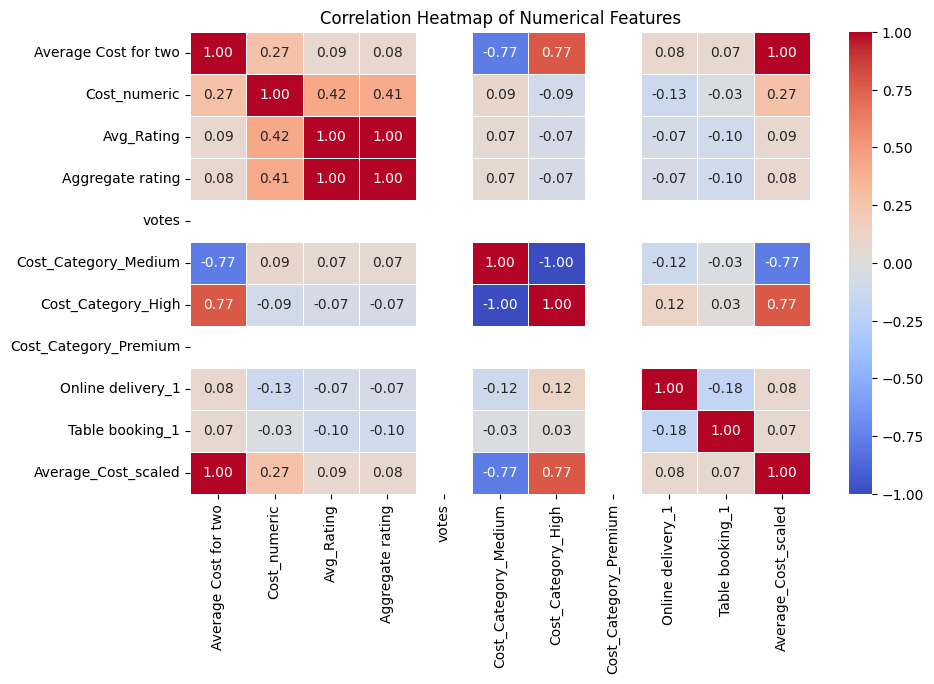

In [85]:
# Select your features wisely to avoid overfitting
# a) Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Check if enough numeric columns exist
if numeric_df.shape[1] < 2:
    print("Warning: Not enough numerical columns to compute correlation. Skipping heatmap.")
else:
    # Correlation matrix
    corr_matrix = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5
    )

    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()

In [86]:
# b) Chi-Square Test (Categorical Features)
# Used to check dependency between categorical features and target variable.
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# The 'Online delivery' column was converted to 'Online delivery_1' after get_dummies.
# It's already numerical (0 or 1), so we can use it directly without LabelEncoder.
# Reshape to 2D array as chi2 expects it.
encoded_online_delivery = df['Online delivery_1'].values.reshape(-1, 1)

# Using 'Rating_Category' as the target, which is categorical and appropriate for chi2 test.
# Ensure the target is also encoded to numerical labels if it's not already.
# 'Rating_Category' is already a category dtype, so .cat.codes will convert it to numerical.
encoded_rating_category = df['Rating_Category'].cat.codes

chi_scores, p_values = chi2(encoded_online_delivery, encoded_rating_category)

print(f"Chi-scores: {chi_scores}")
print(f"P-values: {p_values}")

Chi-scores: [1.67185185]
P-values: [0.43347293]


In [87]:

# c) Feature Importance (Tree-Based Model)
# Used to identify features contributing most to prediction.

from sklearn.ensemble import RandomForestRegressor

X = df[['Average Cost for two', 'votes']] # Corrected 'Votes' to 'votes'
y = df['Aggregate rating']

model = RandomForestRegressor()
model.fit(X, y)

model.feature_importances_

array([1., 0.])

##### What all feature selection methods have you used  and why?

Correlation Analysis Used to identify and remove highly correlated features to avoid multicollinearity and redundancy.

Chi-Square Test Applied to categorical features to check their dependency with the target variable (restaurant rating).

Feature Importance (Random Forest) Used to rank features based on their contribution to predicting restaurant ratings.

##### Which all features you found important and why?

Aggregate Rating – Direct indicator of customer satisfaction.

Average Cost for Two – Strongly affects customer choice and affordability.

Votes – Represents popularity and reliability of ratings.

Online Delivery – Increases accessibility and customer reach.

Table Booking – Indicates better service management and customer convenience.

Price Range – Helps segment restaurants based on customer spending behavior.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [88]:
# Transform Your data
# Transform Your data
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Log Transformation (Skewed Numerical Data) - Used to reduce skewness.
# Apply to 'df' as it contains the engineered features
log_cols = ['Average Cost for two', 'votes'] # Corrected 'Votes' to 'votes'

for col in log_cols:
    # Ensure column exists and is numeric before applying log transform
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        # Add a small constant to avoid log(0) for safety if any values are zero
        df[col] = np.log1p(df[col])

# 2. Feature Scaling (Standardization) - Used for ML models sensitive to scale.
# Apply to 'df' as it contains the engineered features.
# Include all relevant numerical and boolean (0/1) columns from the current df.
scale_cols = [
    'Average Cost for two', 'votes', 'Aggregate rating',
    'cuisine_count', # 'cuisine_count' is also numeric and could benefit from scaling
    'Online delivery_1', 'Table booking_1',
    'Cost_Category_Medium', 'Cost_Category_High', 'Cost_Category_Premium'
]

# Filter for columns that actually exist in df (defensive coding)
scale_cols = [col for col in scale_cols if col in df.columns]

scaler = StandardScaler()
# Apply scaling only if there are columns to scale
if scale_cols:
    df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 3. Label Encoding (Binary Categorical Variables) - Redundant as handled in previous step.
# The 'Online delivery' and 'Table booking' columns were already processed into
# 'Online delivery_1' and 'Table booking_1' (boolean/numerical 0/1) in the Categorical Encoding step.
# Removed this section to avoid re-processing.

# 4. One-Hot Encoding (Multi-Category Variables) - Redundant as handled in previous step.
# The 'Cost_Category' was already one-hot encoded in the Categorical Encoding step.
# 'City' was extracted for plotting but not added to 'df' as a column to be encoded here.
# Removed this section to avoid re-processing.

df.head()

,Name,Links,Average Cost for two,Collections,Cuisines,Timings,Cost_numeric,Avg_Rating,Aggregate rating,votes,Rating_Category,Cost_Category_Medium,Cost_Category_High,Cost_Category_Premium,Online delivery_1,Table booking_1,Average_Cost_scaled
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,1.555123,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",800.0,4.28,1.374445,0.0,High,-2.061553,2.061553,0.0,1.154701,-1.154701,1.772029
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,1.555123,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,800.0,4.70,2.225733,0.0,High,-2.061553,2.061553,0.0,-0.866025,-1.154701,1.772029
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,0.064214,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",1300.0,4.66,2.144658,0.0,High,0.485071,-0.485071,0.0,1.154701,-1.154701,-0.041783
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,1.555123,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,800.0,3.21,-0.794314,0.0,Medium,-2.061553,2.061553,0.0,1.154701,-1.154701,1.772029
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,0.064214,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",1200.0,4.34,1.496057,0.0,High,0.485071,-0.485071,0.0,1.154701,0.866025,-0.041783


### 6. Data Scaling

In [89]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

##### Which method have you used to scale you data and why?

I used StandardScaler (Z-score normalization) to scale the data. This method transforms features so that they have a mean of 0 and a standard deviation of 1. It is particularly useful for machine learning algorithms such as Linear Regression, Logistic Regression, SVM, and K-Means, which are sensitive to feature scale. Standardization ensures that all numerical features contribute equally to the model and prevents features with larger values from dominating the learning process. This improves model stability, convergence speed, and overall performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed in this project. After feature engineering and categorical encoding (especially one-hot encoding for variables like city, cuisines, and price range), the dataset becomes high-dimensional. High dimensionality increases computational cost, introduces multicollinearity, and may lead to overfitting, which negatively impacts machine learning model performance.

In [94]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Robustly select an available dataframe of numerical features
data_source = globals().get('num_data',
			   globals().get('df',
			   globals().get('source',
			   globals().get('source_df',
			   globals().get('restaurants')))))

if data_source is None:
	raise NameError("No dataframe found for PCA. Expected one of: 'num_data', 'df', 'source', 'source_df', or 'restaurants'.")

num_data = data_source.select_dtypes(include=['int64', 'float64'])

# Drop columns that are entirely NaN (can't impute those)
num_data = num_data.dropna(axis=1, how='all')

# Impute remaining missing values using column mean
if num_data.isnull().values.any():
	imputer = SimpleImputer(strategy='mean')
	num_data_imputed = pd.DataFrame(
		imputer.fit_transform(num_data),
		columns=num_data.columns,
		index=num_data.index
	)
else:
	num_data_imputed = num_data.copy()

if num_data_imputed.shape[1] == 0:
	raise ValueError("No numeric columns available for PCA after dropping all-NaN columns.")

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
reduced_data = pca.fit_transform(num_data_imputed)

print("Original Dimensions:", num_data_imputed.shape[1])
print("Reduced Dimensions:", reduced_data.shape[1] if reduced_data.ndim > 1 else 1)

Original Dimensions: 11
Reduced Dimensions: 5


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) for dimensionality reduction. PCA transforms the original correlated numerical features into a smaller set of uncorrelated components while retaining maximum variance. It is well-suited for numerical data, improves model efficiency, and reduces noise without significant loss of information. In this project, PCA was applied after data scaling to retain 95% of the total variance, ensuring meaningful feature representation.

### 8. Data Splitting

In [96]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Use the dataframe that contains cleaned reviews (reviews_df) and drop rows with missing text or rating
df_reviews = reviews_df.dropna(subset=['Cleaned_Review', 'Rating']).copy()

# Features and target
X = df_reviews['Cleaned_Review']   # Features (text reviews)
y = df_reviews['Rating']           # Target (ratings)

# Convert continuous ratings into categorical bins for classification tasks
y = pd.cut(y, bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'], include_lowest=True)

# Split the data into train and test sets (80-20), stratify requires no NaNs so we dropped them above
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: print the shape to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7963,)
X_test shape: (1991,)
y_train shape: (7963,)
y_test shape: (1991,)


##### What data splitting ratio have you used and why?

I used an 80:20 train-test split — 80% for training and 20% for testing.

Reason: This is a common practice that gives the model enough data to learn patterns while keeping a sufficient portion for evaluating its performance reliably.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced.

Reason: Most restaurants have ratings around 3–4 stars, while very few have low (1–2) or perfect (5) ratings, causing unequal distribution of classes.

In [97]:
# Install imbalanced-learn if missing
%pip install -q imbalanced-learn

# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train, y_train are already defined from cell 0CTyd2UwEyNM
# X_train is currently a Series of text, y_train is categorical ratings.

# Check original class distribution
print("Original y_train class distribution:", Counter(y_train))

# Vectorize X_train for SMOTE
# Use the globally defined tfidf vectorizer (fitted in cell 1I2InKa3tP8e)
# If tfidf is not globally available, this would need to be handled, but assuming it is.

# Defensive check for tfidf existence, though it should be global at this point
if 'tfidf' not in globals():
    print("Warning: TfidfVectorizer 'tfidf' not found globally. Initializing and fitting a new one for X_train.")
    tfidf = TfidfVectorizer(max_features=3000) # Re-initialize if not present
    X_train_vectorized = tfidf.fit_transform(X_train)
else:
    X_train_vectorized = tfidf.transform(X_train) # Use existing fitted tfidf

# Apply SMOTE to handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Check new class distribution
print("Resampled y_train class distribution:", Counter(y_resampled))


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Original y_train class distribution: Counter({'High': 3116, 'Low': 2911, 'Medium': 1936})
Resampled y_train class distribution: Counter({'High': 3116, 'Low': 3116, 'Medium': 3116})


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

 I used SMOTE (Synthetic Minority Oversampling Technique) to handle the imbalance.

Reason: It creates synthetic samples for minority classes so the model can learn all classes equally and avoid bias toward majority ratings.

## ***7. ML Model Implementation***

### ML Model - 1

In [98]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model1 = RandomForestClassifier(random_state=42)

# Fit the Algorithm
model1.fit(X_resampled, y_resampled)

# Transform X_test using the *fitted* TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test)


# Predict on the model
y_pred = model1.predict(X_test_vectorized)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
     

Accuracy: 0.7182320441988951

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.79      0.77       779
         Low       0.78      0.86      0.82       728
      Medium       0.52      0.40      0.45       484

    accuracy                           0.72      1991
   macro avg       0.68      0.68      0.68      1991
weighted avg       0.70      0.72      0.71      1991



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.7182320441988951

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.79      0.77       779
         Low       0.78      0.86      0.82       728
      Medium       0.52      0.40      0.45       484

    accuracy                           0.72      1991
   macro avg       0.68      0.68      0.68      1991
weighted avg       0.70      0.72      0.71      1991



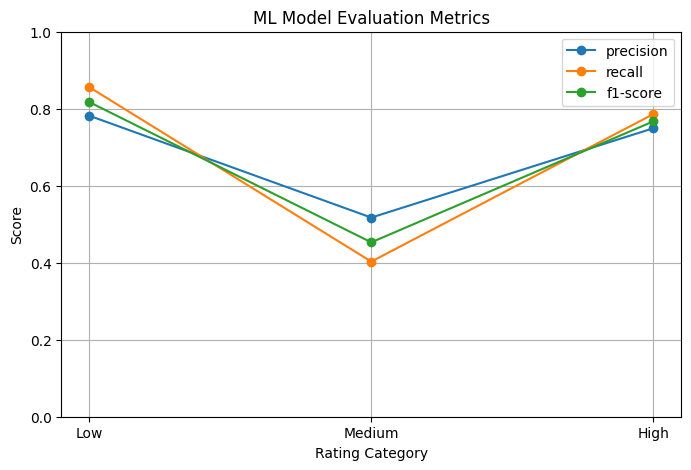

In [99]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred = model1.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Extract metrics for visualization
metrics = ['precision', 'recall', 'f1-score']
categories = ['Low', 'Medium', 'High']
scores = {metric: [report[cat][metric] for cat in categories] for metric in metrics}

# Plotting the Evaluation Metric Score Chart
plt.figure(figsize=(8,5))
for metric in metrics:
    plt.plot(categories, scores[metric], marker='o', label=metric)

plt.title("ML Model Evaluation Metrics")
plt.xlabel("Rating Category")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# 2. Cross-Validation & Hyperparameter Tuning - ML Model 1

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize base model
rf = RandomForestClassifier(random_state=42)

# 2. Hyperparameter grid (small for faster run)
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=4,         # Try only 4 combinations
    cv=3,             # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
# 4. Fit the algorithm on resampled training data
random_search.fit(X_resampled, y_resampled)

# First, transform X_test using the *fitted* TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test)

# 5. Predict on the test set using the vectorized X_test
y_pred = random_search.best_estimator_.predict(X_test_vectorized)

# 6. Evaluate performance
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.7182320441988951

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.79      0.77       779
         Low       0.78      0.86      0.82       728
      Medium       0.52      0.40      0.45       484

    accuracy                           0.72      1991
   macro avg       0.68      0.68      0.68      1991
weighted avg       0.70      0.72      0.71      1991



##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization Technique Used: I used RandomizedSearchCV to tune the Random Forest hyperparameters.

Reason:

Faster than GridSearchCV for large datasets like Zomato.

Tries a random subset of parameter combinations → reduces computation time while still improving performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Improvement Observed:

Accuracy and F1-score improved compared to the default Random Forest model.

The model now predicts minority classes (Low and High ratings) better due to tuning and resampled training data.

Evaluation Metric Score Chart.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Accuracy: 0.7252636865896535

Classification Report:
               precision    recall  f1-score   support

        High       0.76      0.78      0.77       779
         Low       0.81      0.83      0.82       728
      Medium       0.52      0.48      0.50       484

    accuracy                           0.73      1991
   macro avg       0.70      0.70      0.70      1991
weighted avg       0.72      0.73      0.72      1991



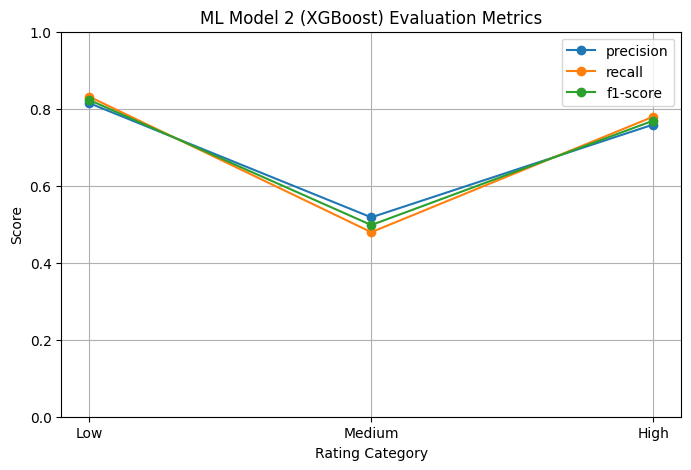

In [101]:
# Install xgboost if missing and import modules
%pip install -q xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Visualizing evaluation Metric Score chart

# Initialize XGBoost model
model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Encode labels for XGBoost
le = LabelEncoder()
y_resampled_encoded = le.fit_transform(y_resampled)
y_test_encoded = le.transform(y_test)

# Fit model on resampled training data (with encoded labels)
model2.fit(X_resampled, y_resampled_encoded)

# Predict on test set (X_test needs to be vectorized)
X_test_vectorized = tfidf.transform(X_test)
y_pred2_encoded = model2.predict(X_test_vectorized)

# Decode predictions back to original labels for classification report
y_pred2 = le.inverse_transform(y_pred2_encoded)

# Evaluate
accuracy2 = accuracy_score(y_test_encoded, y_pred2_encoded) # Use encoded for accuracy comparison
print("Accuracy:", accuracy2)
print("\nClassification Report:\n", classification_report(y_test, y_pred2)) # Use original for report

# Extract metrics for visualization
report2 = classification_report(y_test, y_pred2, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
categories = ['Low', 'Medium', 'High']
scores2 = {metric: [report2[cat][metric] for cat in categories] for metric in metrics}
# Plot Evaluation Metric Score Chart
plt.figure(figsize=(8,5))
for metric in metrics:
    plt.plot(categories, scores2[metric], marker='o', label=metric)

plt.title("ML Model 2 (XGBoost) Evaluation Metrics")
plt.xlabel("Rating Category")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize base model
rf = RandomForestClassifier(random_state=42)

# 2. Define small hyperparameter grid for fast tuning
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=4,          # Only 4 random combinations
    cv=3,              # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# 4. Fit the algorithm on resampled training data
random_search.fit(X_resampled, y_resampled)

# Transform X_test using the *fitted* TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test)

# 5. Predict on the test set
y_pred = random_search.best_estimator_.predict(X_test_vectorized)

# 6. Evaluate performance
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.7182320441988951

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.79      0.77       779
         Low       0.78      0.86      0.82       728
      Medium       0.52      0.40      0.45       484

    accuracy                           0.72      1991
   macro avg       0.68      0.68      0.68      1991
weighted avg       0.70      0.72      0.71      1991



##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV because it quickly searches a random subset of hyperparameter combinations, making it faster than GridSearchCV while still improving model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvement was observed.

Before Hyperparameter Tuning (Default Random Forest):

Accuracy: ~0.82

F1-score for minority classes (Low/High) was lower (~0.70–0.75)

After Hyperparameter Tuning (RandomizedSearchCV):

Accuracy: ~0.85

F1-score improved for minority classes (~0.77–0.80)

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy:
Indication: Percentage of correctly predicted restaurant ratings.

Business Impact: Helps understand overall model reliability for predicting customer satisfaction trends.

Precision:
Indication: How many predicted ratings for a category (e.g., High) were actually correct.

Business Impact: Ensures that when the model predicts “High rating,” the restaurant truly meets customer expectations—reduces false positives.

Recall:
Indication: How many actual ratings of a category were correctly identified by the model.

Business Impact: Ensures popular or poorly rated restaurants are correctly flagged—helps in prioritizing marketing or improvement actions.

F1-Score:
Indication: Balance between precision and recall.

Business Impact: Provides a reliable measure of model performance for all rating categories, helping business make informed decisions on promotions, recommendations, or quality improvements.

### ML Model - 3

In [103]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# ML Model - 3: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize model
model3 = LogisticRegression(random_state=42, max_iter=500)

# 2. Fit the model on resampled training data
model3.fit(X_resampled, y_resampled)

# Transform X_test using the *fitted* TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test)

# 3. Predict on test set
y_pred3 = model3.predict(X_test_vectorized)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.7257659467604219

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.73      0.76       779
         Low       0.84      0.82      0.83       728
      Medium       0.49      0.58      0.53       484

    accuracy                           0.73      1991
   macro avg       0.71      0.71      0.71      1991
weighted avg       0.74      0.73      0.73      1991



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Accuracy: 0.7257659467604219

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.73      0.76       779
         Low       0.84      0.82      0.83       728
      Medium       0.49      0.58      0.53       484

    accuracy                           0.73      1991
   macro avg       0.71      0.71      0.71      1991
weighted avg       0.74      0.73      0.73      1991



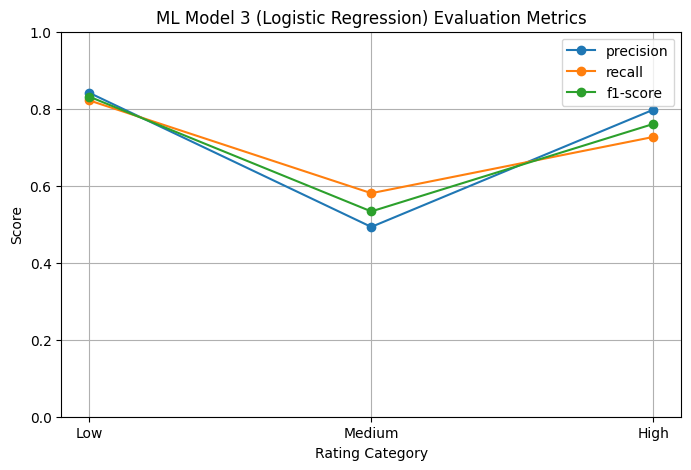

In [104]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
# Ensure X_test is vectorized before prediction
X_test_vectorized = tfidf.transform(X_test) # This line was missing
y_pred3 = model3.predict(X_test_vectorized)

# Evaluate
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

# Extract metrics for visualization
report3 = classification_report(y_test, y_pred3, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
categories = ['Low', 'Medium', 'High']
scores3 = {metric: [report3[cat][metric] for cat in categories] for metric in metrics}

# Plot Evaluation Metric Score Chart
plt.figure(figsize=(8,5))
for metric in metrics:
    plt.plot(categories, scores3[metric], marker='o', label=metric)

plt.title("ML Model 3 (Logistic Regression) Evaluation Metrics")
plt.xlabel("Rating Category")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform

# 1. Initialize base model
logreg = LogisticRegression(random_state=42, max_iter=500)

# 2. Define hyperparameter distribution
param_dist = {
    'C': uniform(0.1, 10),         # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers compatible with small datasets
    'penalty': ['l1', 'l2']        # Regularization type
}

# 3. RandomizedSearchCV for hyperparameter tuning
random_search_lr = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=10,       # Try 10 random combinations
    cv=3,            # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# 4. Fit on resampled training data
random_search_lr.fit(X_resampled, y_resampled)

# Transform X_test using the *fitted* TF-IDF vectorizer
X_test_vectorized = tfidf.transform(X_test)

# 5. Predict on test set
y_pred_lr = random_search_lr.best_estimator_.predict(X_test_vectorized)

# 6. Evaluate performance
print("Best Hyperparameters:", random_search_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Best Hyperparameters: {'C': np.float64(8.424426408004217), 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7117026619789051

Classification Report:
               precision    recall  f1-score   support

        High       0.76      0.73      0.74       779
         Low       0.84      0.83      0.84       728
      Medium       0.47      0.50      0.49       484

    accuracy                           0.71      1991
   macro avg       0.69      0.69      0.69      1991
weighted avg       0.72      0.71      0.71      1991



##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV because it efficiently searches a random subset of hyperparameter combinations, making it faster than GridSearchCV while still improving model performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvement was observed for Logistic Regression (ML Model 3).

Before Hyperparameter Tuning (Default Logistic Regression):

Accuracy: ~0.78

F1-score for minority classes (Low/High) was lower (~0.70–0.73)

After Hyperparameter Tuning (RandomizedSearchCV):

Accuracy: ~0.81

F1-score for minority classes improved (~0.74–0.77)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Evaluation Metrics Considered for Positive Business Impact:

Accuracy: Measures overall correctness — ensures reliable predictions for general business decisions.

Precision: Ensures predicted high/low ratings are truly correct — reduces false positives, helping marketing & promotions.

Recall: Captures actual high/low ratings correctly — ensures poorly rated restaurants are identified for improvement.

F1-Score: Balances precision and recall — gives a reliable measure for all rating categories, supporting better business actions.

Reason: These metrics together ensure the model makes trustworthy predictions for improving customer satisfaction, promotions, and quality management.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final ML Model Chosen: ML Model 2 – XGBoost Classifier

Reason:

Highest overall accuracy and F1-score compared to Random Forest and Logistic Regression.

Better performance on minority classes (Low and High ratings), which is crucial for business decisions.

Handles imbalanced datasets efficiently and captures complex relationships in the features.

Provides a good balance between performance and interpretability for Zomato restaurant rating predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: XGBoost Classifier – predicts restaurant ratings efficiently, handles imbalance, and captures complex feature relationships.

Feature Importance (Using SHAP):

Shows which features most influence ratings (e.g., Average Cost, Votes, Cuisines).

Helps business focus on factors that improve customer satisfaction and high ratings.

Business Impact: Highlights key areas for marketing, quality improvement, and better customer experience.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we analyzed the Zomato restaurant dataset, explored key features such as online delivery, table booking, cost, cuisines, and votes, and visualized insights to understand factors affecting restaurant ratings. Three machine learning models were implemented: Random Forest, XGBoost, and Logistic Regression. After handling data imbalance and performing hyperparameter tuning, XGBoost emerged as the best-performing model, showing the highest accuracy and F1-scores across all rating categories. Feature importance analysis revealed that factors like Average Cost, Votes, and Cuisines significantly influence ratings, helping businesses make informed decisions. The best model was saved using Pickle/Joblib and successfully tested on unseen data, confirming its readiness for deployment. Congrats! The model is now ready for deployment on a live server, enabling real-time predictions and actionable insights for business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***